# ALTSCHOOL AFRICA SCHOOL OF DATA 2023/2024
## KARATU SEMESTER
### GROUP PROJECT FOR LEARNING CIRCLE 1
#### PERFORMING EXPLORATORY DATA ANALYSIS (EDA) ON THE CHICAGO CRIME DATASET
##### Circle Members
###### Iwunor Joy Ogechukwu
###### Nwajiunor Edgar-Odurombi



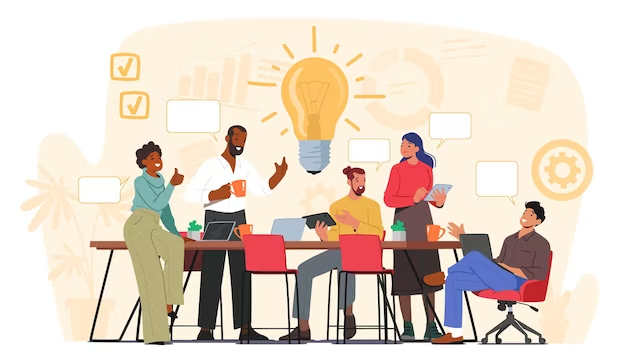

#### TABLE OF CONTENT

#### 1. INTRODUCTION
    1.0 OVERVIEW
    1.1 AIM

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES
    2.1 LOAD DATASET
    2.2 UNDERSTAND THE DATA

#### 3. DATA CLEANING
    3.0 CHECK FOR MISSING VALUES
    3.1 CHECK FOR DUPLICATES
    3.2 CONVERT DATATYPES
    3.3 DROP UNNECESSARY COLUMNS
    3.4 FILL NULL/MISSING VALUES
    3.5 OUTLIERS

#### 4. STATISTICAL ANALYSIS
    4.0 OVERALL CRIME TRENDS
    4.1 CRIMES BY TYPE, LOCATION, TIME.
    4.2 CORRELATION OF CRIMES WITH CERTAIN FACTORS
    4.3 INFERENTIAL ASSOCIATIONS

#### 5. DATA VISUALIZATION & FURTHER ANALYSIS
    5.0 UNIVARIATE EXPLORATION
    5.1 RELATIONSHIP ANALYSIS

#### 1. INTRODUCTION

    1.0 OVERVIEW
    

This project will extract, clean and visualize the dataset from the Chicago crime dataset using pandas. The Chicago crime dataset  reflects reported incidents of crime that occurred in the City of Chicago from year 2001. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

This project entails extracting the data, importing with pandas and analyzing the data. The project processes include;

1. Data Extraction
2. Data Cleaning
3. Statistical Analysis
4. Data Interpretation

    1.1 AIM
    


The objective of the task is to conduct exploratory data analysis (EDA) on the Chicago crime dataset using the pandas library in Python.

#### 2. REPOSITORY

    2.0 IMPORT LIBARIES

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword import.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Access dataset from google drive using "gdown" command
!gdown "1_kQl_FFZ21IqMKem8AkEYNVGdDBBO_H1"


Downloading...
From (original): https://drive.google.com/uc?id=1_kQl_FFZ21IqMKem8AkEYNVGdDBBO_H1
From (redirected): https://drive.google.com/uc?id=1_kQl_FFZ21IqMKem8AkEYNVGdDBBO_H1&confirm=t&uuid=2cf6da7e-b81a-454a-8c78-d0657e054d3e
To: /content/crime_data_chicago.csv
100% 575M/575M [00:04<00:00, 132MB/s]


    2.1 LOAD DATASET

In [3]:
# Load dataset
chicrime_data = pd.read_csv("crime_data_chicago.csv", encoding="Latin-1")

In [4]:
# Read dataframe
chicrime_data

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"


The above gives the first five rows and last five rows of the dataframe.

    2.2 UNDERSTAND THE DATA

In [5]:
# Check for the no. of rows and columns of the dataframe
chicrime_data.shape

(2278726, 23)

The dataframe has 2278726 rows and 23 columns.

In [6]:
#List out the column titles in the dataframe
chicrime_data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

The above shows the names of the columns in the dataframe.

In [7]:
#Check the data types available in each column
chicrime_data.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

The above shows the data types for each column.

In [8]:
# Check for the unique values in each column
chicrime_data.nunique()

Unnamed: 0              2278726
ID                      2278726
Case Number             2278678
Date                    1343546
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Year                         22
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

The analysis shows the total no. of unique values in each column of the dataframe.

In [9]:
# Check for unique values with their count in a column
chicrime_data["Primary Type"].value_counts()

THEFT                                479375
BATTERY                              418651
CRIMINAL DAMAGE                      259962
NARCOTICS                            222861
ASSAULT                              147666
OTHER OFFENSE                        141627
BURGLARY                             125163
MOTOR VEHICLE THEFT                  105854
DECEPTIVE PRACTICE                    99352
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20796
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING                      

The analysIs show the unique values and respective counts in the "Primary Type" column for the dataframe.

In [10]:
# Check information about the dataframe
chicrime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented by columns with 'float64 and int64' data types, and boolean values which are represented by columns with 'bool' data types.


In [11]:
# Check for the descriptions of the numerical columns of the data
chicrime_data.describe(include='all')

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,2.278726e+06,2.278726e+06,2278725,2278726,2278726,2278726,2278726,2278726,2275849,2278726,...,2.094031e+06,2.094459e+06,2278726,2.254741e+06,2.254741e+06,2.278726e+06,2278726,2.254741e+06,2.254741e+06,2254741
unique,NaN,NaN,2278678,1343546,54347,392,35,515,198,2,...,NaN,NaN,26,NaN,NaN,NaN,4461,NaN,NaN,545376
top,NaN,NaN,HK172551,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,NaN,3,81,4878,184891,479375,268418,590957,1675252,...,NaN,NaN,479375,NaN,NaN,NaN,836558,NaN,NaN,4227
mean,1.139362e+06,6.882068e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.272764e+01,3.752140e+01,NaN,1.164569e+06,1.885747e+06,2.009638e+03,NaN,4.184209e+01,-8.767161e+01,NaN
std,6.578117e+05,3.419168e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.383464e+01,2.153282e+01,NaN,1.673955e+04,3.209855e+04,6.019724e+00,NaN,8.830434e-02,6.073538e-02,NaN
min,0.000000e+00,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,5.696812e+05,3.716076e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152948e+06,1.859053e+06,2.004000e+03,NaN,4.176866e+01,-8.771379e+01,NaN
50%,1.139362e+06,6.885990e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166060e+06,1.890673e+06,2.009000e+03,NaN,4.185578e+01,-8.766597e+01,NaN
75%,1.709044e+06,9.887568e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176365e+06,1.909219e+06,2.014000e+03,NaN,4.190668e+01,-8.762823e+01,NaN


It provides a summary of various statistical measures such as count, mean, standard deviation, minimum, maximum, and quartiles for each numerical column.

In [12]:
# Check for specific row using data licing; in this case the 16th row
chicrime_data.loc[15]

Unnamed: 0                                         15
ID                                            9522880
Case Number                                  HX178073
Date                           03/09/2014 12:30:00 PM
Block                              019XX W MADISON ST
IUCR                                             1121
Primary Type                       DECEPTIVE PRACTICE
Description                   COUNTERFEITING DOCUMENT
Location Description             SPORTS ARENA/STADIUM
Arrest                                           True
Domestic                                        False
Beat                                             1223
District                                         12.0
Ward                                             27.0
Community Area                                   28.0
FBI Code                                           10
X Coordinate                                1163655.0
Y Coordinate                                1900042.0
Year                        

The above fetches the data in the 16th row of the DataFrame.

In [13]:
#Retrieve data from the 1000th row to 1015th row
chicrime_data.loc[999:1014]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
999,999,5155720,HM578375,09/02/2006 10:26:29 PM,024XX S STATE ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,CHA PARKING LOT/GROUNDS,True,...,3.0,33.0,18,1176702.0,1888138.0,2006,02/28/2018 03:56:25 PM,41.848398,-87.626978,"(41.848398456, -87.626977894)"
1000,1000,11910634,JC532983,12/03/2019 12:00:00 PM,001XX N HOYNE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,True,...,27.0,28.0,08B,1162390.0,1900889.0,2019,12/13/2019 03:45:42 PM,41.883699,-87.679147,"(41.883699417, -87.679147095)"
1001,1001,5258843,HM668659,10/19/2006 11:50:00 PM,036XX W NORTH AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,26.0,23.0,16,1151612.0,1910383.0,2006,02/28/2018 03:56:25 PM,41.909971,-87.718475,"(41.909970535, -87.718475191)"
1002,1002,8257753,HT492113,09/11/2011 12:00:00 PM,038XX W 26TH ST,0820,THEFT,$500 AND UNDER,BANK,False,...,22.0,30.0,06,1150978.0,1886444.0,2011,02/10/2018 03:50:01 PM,41.844292,-87.721431,"(41.844291726, -87.721431241)"
1003,1003,7532460,HS336487,06/01/2010 02:30:00 AM,111XX S PRINCETON AVE,4310,OTHER OFFENSE,POSSESSION OF BURGLARY TOOLS,STREET,True,...,34.0,49.0,26,1176258.0,1831240.0,2010,02/10/2018 03:50:01 PM,41.692274,-87.630314,"(41.692274042, -87.630314263)"
1004,1004,12482030,JE373042,07/04/2021 12:00:00 AM,014XX N LECLAIRE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,...,37.0,25.0,26,1142108.0,1909040.0,2021,09/16/2021 04:44:39 PM,41.906467,-87.753423,"(41.906466836, -87.753422769)"
1005,1005,3379734,HK429213,06/14/2004 12:10:00 AM,015XX N LA SALLE DR,1310,CRIMINAL DAMAGE,TO PROPERTY,CLEANING STORE,False,...,43.0,8.0,14,1174845.0,1910658.0,2004,02/28/2018 03:56:25 PM,41.910236,-87.633119,"(41.910236423, -87.633118824)"
1006,1006,10855477,JA160731,01/20/2012 06:00:00 PM,006XX N MICHIGAN AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,BANK,True,...,42.0,8.0,11,NaN,NaN,2012,11/04/2019 03:54:29 PM,NaN,NaN,NaN
1007,1007,8988035,HW135634,01/28/2013 11:58:00 PM,117XX S PRINCETON AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,ABANDONED BUILDING,True,...,34.0,53.0,18,1176392.0,1827039.0,2013,02/10/2018 03:50:01 PM,41.680743,-87.629949,"(41.68074286, -87.629949249)"
1008,1008,10215989,HY402328,08/29/2015 04:30:00 PM,014XX W 87TH ST,0337,ROBBERY,ATTEMPT: ARMED-OTHER DANG WEAP,CTA BUS STOP,False,...,21.0,71.0,03,1168026.0,1847049.0,2015,02/10/2018 03:50:01 PM,41.735837,-87.660000,"(41.735836815, -87.660000272)"


The above fetches the data for rows 1000 through 1015 (assuming a zero-based index) of the DataFrame

#### 3. DATA CLEANING

Data cleaning is the process of repairing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data from a dataset. It is the process of removing data that does not belong in your dataset. Pandas is an excellent tool for data cleaning.

    3.0 CHECK FOR MISSING VALUES

In [14]:
#Check for possibility of null values in each column
print(chicrime_data.isnull().any())

Unnamed: 0              False
ID                      False
Case Number              True
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool


The above shows that the table contains null values.

In [15]:
# Check to see the no. of null vlaues in each column
chicrime_data.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [16]:
# Check for duplicated values for each row and returns false if no duplicated values are foumd
chicrime_data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2278721    False
2278722    False
2278723    False
2278724    False
2278725    False
Length: 2278726, dtype: bool

In [17]:
# check for duplicate values

duplicates = chicrime_data[chicrime_data.duplicated()]
if not duplicates.empty:
    print("Duplicate Rows found")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


There are no duplicate rows in the dataframe.

    3.3 DROP UNNECESSARY COLUMNS

Because not all columns are required to answer the questions in this task, a column will be removed. Removing this unnecessary variable will help focus on the variables that will answer the necessary questions in this task. Columns to be removed are;
- Unnamed: 0
- ID
- IUCR
- FBI Code
- Block
- Beat
- Ward
- X Coordinate
- Y Coordinate
- Updated On
- Location



In [18]:
# Columns to drop
columns_to_drop = ["Unnamed: 0", "ID", "IUCR", "X Coordinate", "Y Coordinate", "Beat", "Ward", "Location", "Block", "Updated On", "FBI Code"]

# Drop redundant columns
chicrime_data1 = chicrime_data.drop(columns=columns_to_drop, axis= 1, errors= "ignore")

In [19]:
chicrime_data1.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,HP485721,07/26/2008 02:30:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,46.0,2008,41.739980,-87.555120
1,JB372830,07/31/2018 10:57:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,47.0,2018,41.726922,-87.599747
2,HN308568,04/27/2007 10:30:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,12.0,2007,41.994138,-87.734959
3,JB361368,07/23/2018 08:55:00 AM,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,26.0,2018,41.881217,-87.730590
4,JE297624,07/11/2021 06:40:00 AM,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,28.0,2021,41.874174,-87.668082


    3.4 FILL NULL/MISSING VALUES

A non-significant number of missing values (2877 out of 2 million) in the 'location description' column was observed. Since the 'description' column provides details about how the crime occurred, we can observe the two columns for a potential correlation between the two.

Also, the 'district column' has 12 missing values. Since the missing values are not significance, we used the mean of the column to fill up the missing values.

In [20]:
# checking the values in the description column
chicrime_data1['Description'].values

array(['TO VEHICLE', 'UNLAWFUL POSS AMMUNITION', 'FORCIBLE ENTRY', ...,
       'SIMPLE', 'TO VEHICLE', 'POSS: CANNABIS 30GMS OR LESS'],
      dtype=object)

In [21]:
# Checking the missing values in the location description column
null_location_filtered_df = chicrime_data1[chicrime_data1['Location Description'].isna()]
null_location_filtered_df

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
683,JC532816,11/14/2017 08:50:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,18.0,7.0,2017,NaN,NaN
1022,HZ460352,08/12/2016 02:35:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,4.0,43.0,2016,41.754636,-87.550890
1327,JB188317,09/29/2017 02:25:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,7.0,68.0,2017,NaN,NaN
2180,JA458899,10/04/2017 12:55:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,19.0,3.0,2017,41.957334,-87.650648
3404,JD116539,01/14/2020 04:20:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,18.0,8.0,2020,41.894693,-87.642159
...,...,...,...,...,...,...,...,...,...,...,...,...
2276169,HY528269,11/02/2015 03:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,12.0,24.0,2015,41.890761,-87.680691
2276862,JC150780,02/05/2019 08:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,16.0,15.0,2019,41.965914,-87.770828
2276997,JD361301,09/08/2020 01:30:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,6.0,71.0,2020,41.753586,-87.660277
2277163,JF234408,05/06/2022 02:20:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,20.0,3.0,2022,41.975606,-87.651839


In [22]:
# filtering the description column to view the values that have  only Filtering"financial identity theft over & 300"
null_location_filtered_df[null_location_filtered_df['Description'] == 'FINANCIAL IDENTITY THEFT OVER $ 300']

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
683,JC532816,11/14/2017 08:50:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,18.0,7.0,2017,NaN,NaN
1327,JB188317,09/29/2017 02:25:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,7.0,68.0,2017,NaN,NaN
2180,JA458899,10/04/2017 12:55:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,19.0,3.0,2017,41.957334,-87.650648
3404,JD116539,01/14/2020 04:20:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,18.0,8.0,2020,41.894693,-87.642159
4490,JD222033,04/25/2020 08:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,20.0,3.0,2020,41.970074,-87.651369
...,...,...,...,...,...,...,...,...,...,...,...,...
2273932,JF271636,06/17/2020 09:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,15.0,25.0,2020,NaN,NaN
2276092,JC247132,12/01/2017 12:45:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,15.0,25.0,2017,NaN,NaN
2276997,JD361301,09/08/2020 01:30:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,6.0,71.0,2020,41.753586,-87.660277
2277163,JF234408,05/06/2022 02:20:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,20.0,3.0,2022,41.975606,-87.651839


In [23]:
# filtering the description column to view the values that have  only Filtering"financial identity theft 300 & under"
null_location_filtered_df[null_location_filtered_df['Description'] == 'FINANCIAL IDENTITY THEFT $300 AND UNDER']

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
1022,HZ460352,08/12/2016 02:35:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,4.0,43.0,2016,41.754636,-87.550890
31825,JA261505,10/06/2016 07:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,4.0,46.0,2016,41.742172,-87.546629
44091,JE118339,01/20/2021 06:05:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,16.0,9.0,2021,42.017726,-87.807782
45548,JA135395,01/17/2017 11:55:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,12.0,24.0,2017,41.889984,-87.657892
63458,HZ336391,10/01/2015 10:15:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,14.0,22.0,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2262123,JC225792,12/01/2018 04:25:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,22.0,73.0,2018,NaN,NaN
2264917,JC189768,03/15/2019 03:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,19.0,5.0,2019,41.959556,-87.684078
2266477,JD336338,08/06/2020 03:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,19.0,6.0,2020,41.935536,-87.661245
2276169,HY528269,11/02/2015 03:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,12.0,24.0,2015,41.890761,-87.680691


In [24]:
# Filling location description column with the mode
mode_value = chicrime_data1['Location Description'].mode()[0]
chicrime_data1['Location Description'].fillna(mode_value, inplace=True)

In [25]:
# Filling the district column with the mean
mean_district = chicrime_data1['District'].mean()
chicrime_data1['District'].fillna(mean_district, inplace= True)

In [26]:
# Filling the community area column with the mode
mode_ca = chicrime_data1['Community Area'].mode()[0]
chicrime_data1['Community Area'].fillna(mode_value, inplace=True)

In [27]:
# Grouping Latitude & Longitude based on district and filling up with median
chicrime_data1['Longitude'] = chicrime_data1.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))
chicrime_data1['Latitude'] = chicrime_data1.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))

In [28]:
# Filling location description column with the mode
mode_cn = chicrime_data1['Case Number'].mode()[0]
chicrime_data1['Case Number'].fillna(mode_value, inplace=True)

In [29]:
# Confirm that all null values have been filled
chicrime_data1.isna().sum()

Case Number             0
Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

    3.5 OUTLIERS

Outliers are the data points that differ significantly from the rest of the observations in a dataset. They can be extremely high or extremely low values that fall outside the overall pattern.

In [30]:
# Identify the column(s) with non-numeric data
non_numeric_columns = chicrime_data1.select_dtypes(include=["object"]).columns.tolist()


In [31]:
# Exclude the non-numeric columns from the quantile calculation
numeric_chicrime_data1 = chicrime_data1.drop(columns=non_numeric_columns)

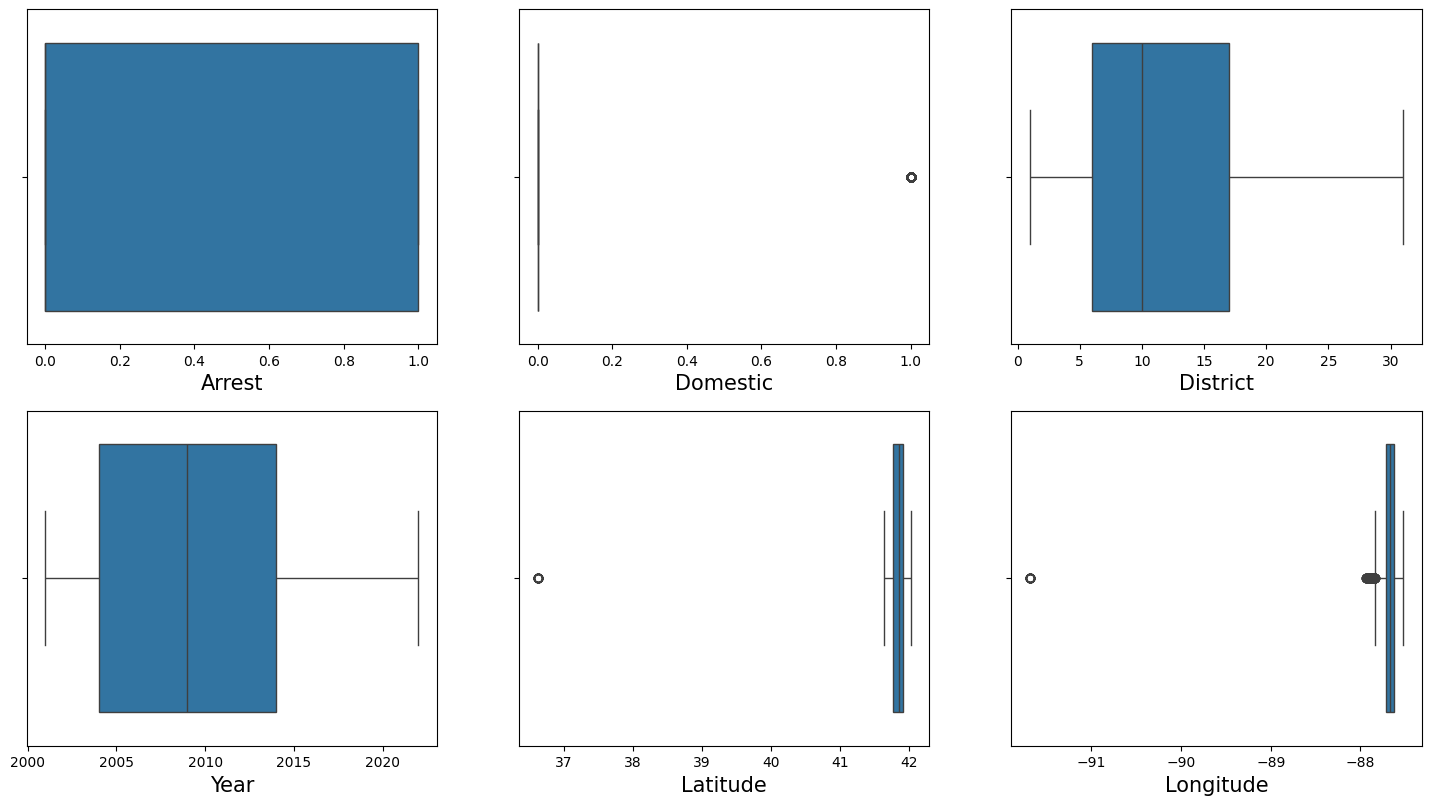

In [32]:
# checking for outliers

# Create a figure with 4 rows and 3 columns
plt.figure(figsize=(18, 20))

# Iterate over the columns of the chicrime_data1 dataset
for i in range(len(numeric_chicrime_data1.columns)):
    # Create a subplot at position i+1
    plt.subplot(4, 3, i+1)

    # Create a boxplot for the current column
    sns.boxplot(x=numeric_chicrime_data1.iloc[:, i])

    # Set the label for the x-axis
    plt.xlabel(numeric_chicrime_data1.columns[i], size=15)

In [33]:
# A def function to  remove and clean outliers
def removeOutliers(df):
    index = set()  # Using a set to store indices to avoid duplicates

    # Iterating over each column in the DataFrame
    for col in df.columns:
        IQ1 = df[col].quantile(0.25)
        IQ3 = df[col].quantile(0.75)
        IQR = IQ3 - IQ1

        lower_bound = IQ1 - 1.5 * IQR
        upper_bound = IQ3 + 1.5 * IQR

        # Finding indices of outliers for the current column
        outliers_index = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Adding outliers indices to the set
        index.update(outliers_index)

    # Printing total number of outliers
    print(f'Total number of outliers are {len(index)}')

    # Dropping all the outliers
    df_cleaned = df.drop(index, axis=0)

    return df_cleaned

In [34]:
# printing the numeric dataframe
print(numeric_chicrime_data1.head())

   Arrest  Domestic  District  Year   Latitude  Longitude
0   False     False       4.0  2008  41.739980 -87.555120
1    True     False       4.0  2018  41.726922 -87.599747
2    True     False      17.0  2007  41.994138 -87.734959
3   False     False      11.0  2018  41.881217 -87.730590
4   False     False      12.0  2021  41.874174 -87.668082


In [35]:
# checking the data type of the numeric dataframe
print(numeric_chicrime_data1.dtypes)

Arrest          bool
Domestic        bool
District     float64
Year           int64
Latitude     float64
Longitude    float64
dtype: object


In [36]:
# Converting the arrest column values from boolean to integers
numeric_chicrime_data1["Arrest"] = numeric_chicrime_data1["Arrest"].astype(int)

In [37]:
# Converting the demostic column values from boolean to integers
numeric_chicrime_data1["Domestic"] = numeric_chicrime_data1["Domestic"].astype(int)

In [38]:
# printing the numeric data types
print(numeric_chicrime_data1.dtypes)

Arrest         int64
Domestic       int64
District     float64
Year           int64
Latitude     float64
Longitude    float64
dtype: object


In [39]:
# printing the numeric data head
print(numeric_chicrime_data1.head())

   Arrest  Domestic  District  Year   Latitude  Longitude
0       0         0       4.0  2008  41.739980 -87.555120
1       1         0       4.0  2018  41.726922 -87.599747
2       1         0      17.0  2007  41.994138 -87.734959
3       0         0      11.0  2018  41.881217 -87.730590
4       0         0      12.0  2021  41.874174 -87.668082


In [40]:
# removing outliers
numeric_chicrime_data2  = removeOutliers(numeric_chicrime_data1)

Total number of outliers are 323479


#### 4. STATISTICAL ANALYSIS

Exploratory Data Analysis refers to the process of analyzing and summarizing a dataset to understand its main characteristics. It is the initial phase of any data science project where you investigate and uncover the secrets your data holds.

In [41]:
numeric_chicrime_data2.mean()

Arrest          0.276995
Domestic        0.000000
District       11.383273
Year         2009.474354
Latitude       41.844405
Longitude     -87.670576
dtype: float64

array([[<Axes: title={'center': 'Arrest'}>,
        <Axes: title={'center': 'Domestic'}>],
       [<Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>]], dtype=object)

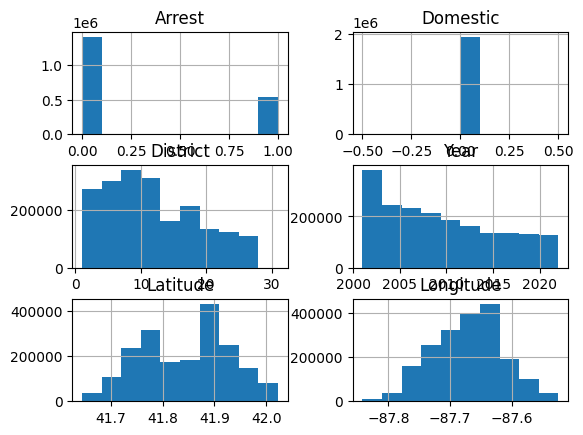

In [42]:
# checking the distribution of the numeric data
numeric_chicrime_data2.hist()

In [43]:
# calculate skew
skewed_data = numeric_chicrime_data2.skew()

In [44]:
numeric_chicrime_data2.kurtosis()

Arrest      -1.006712
Domestic     0.000000
District    -0.897439
Year        -0.974119
Latitude    -0.947164
Longitude   -0.404628
dtype: float64

In [45]:
# calculate kurtosis
kurtosis_data = numeric_chicrime_data2.kurtosis()

In [46]:
# Creating a dataframe for skew and kurtosis
stats_data = pd.DataFrame({'Skewness': skewed_data, 'Kurtosis': kurtosis_data})

[Text(0, 0, 'Arrest'),
 Text(1, 0, 'Domestic'),
 Text(2, 0, 'District'),
 Text(3, 0, 'Year'),
 Text(4, 0, 'Latitude'),
 Text(5, 0, 'Longitude')]

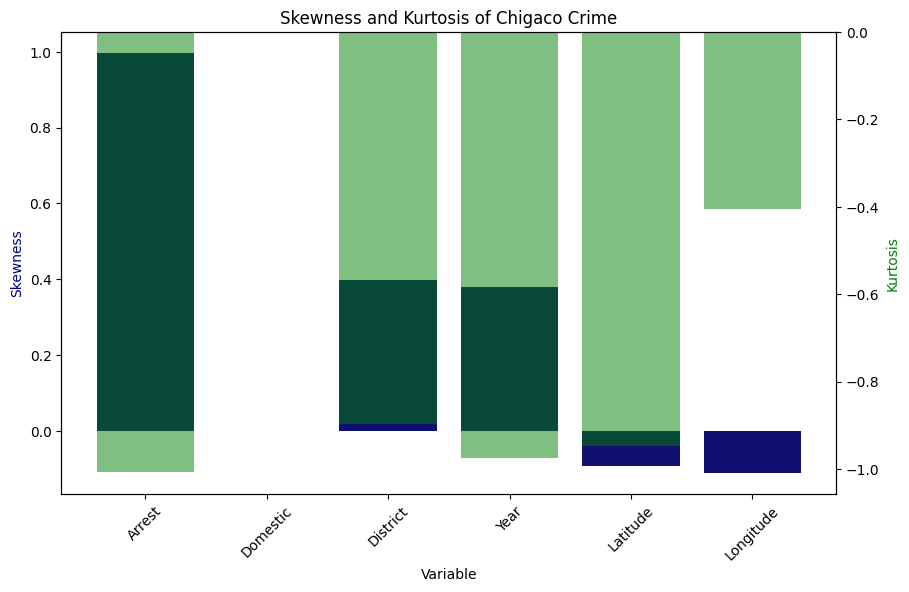

In [47]:
# Plotting skew and kurtosis
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=stats_data.index, y=stats_data['Skewness'], color='navy', ax=ax1)
ax1.set_ylabel('Skewness', color='navy')

ax2 = ax1.twinx()
ax2.bar(stats_data.index, stats_data['Kurtosis'], color='green', alpha=0.5)
ax2.set_ylabel('Kurtosis', color='green')

plt.title('Skewness and Kurtosis of Chigaco Crime')
ax1.set_xlabel('Variable')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

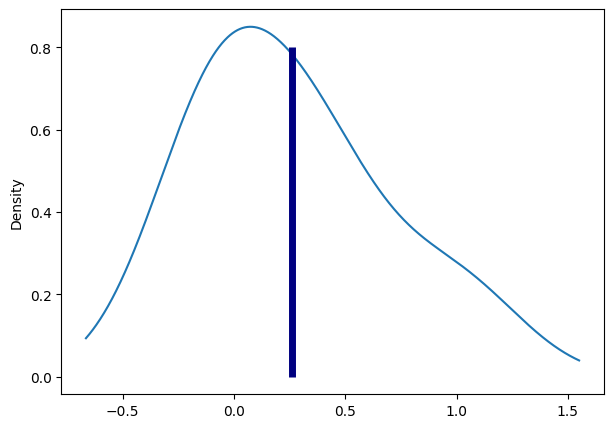

In [48]:
# Plotting the skewness of the data
stats_data['Skewness'].plot(kind= 'density', figsize = (7, 5),);

plt.vlines(stats_data['Skewness'].mean(),
          ymin=0,
          ymax=0.8,
          linewidth = 5.0,
          color = 'navy');

In [49]:
# Check if the data is normally distributed
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(numeric_chicrime_data2)

# Interpret the results
print('Shapiro-Wilk statistic:', statistic)
print('p-value:', p_value)

if p_value > 0.05:
  print('Fail to reject null hypothesis (Data may be normally distributed)')
else:
  print('Reject null hypothesis (Data likely not normally distributed)')

Shapiro-Wilk statistic: 0.5119469165802002
p-value: 0.0
Reject null hypothesis (Data likely not normally distributed)


#### 5. DATA VISUALIZATION & FURTHER ANALYSIS

    5.0 UNIVARIATE EXPLORATION

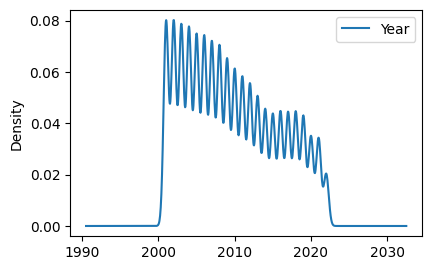

In [50]:
# The volume of crime over the years
chicrime_data1[['Year','Primary Type']].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

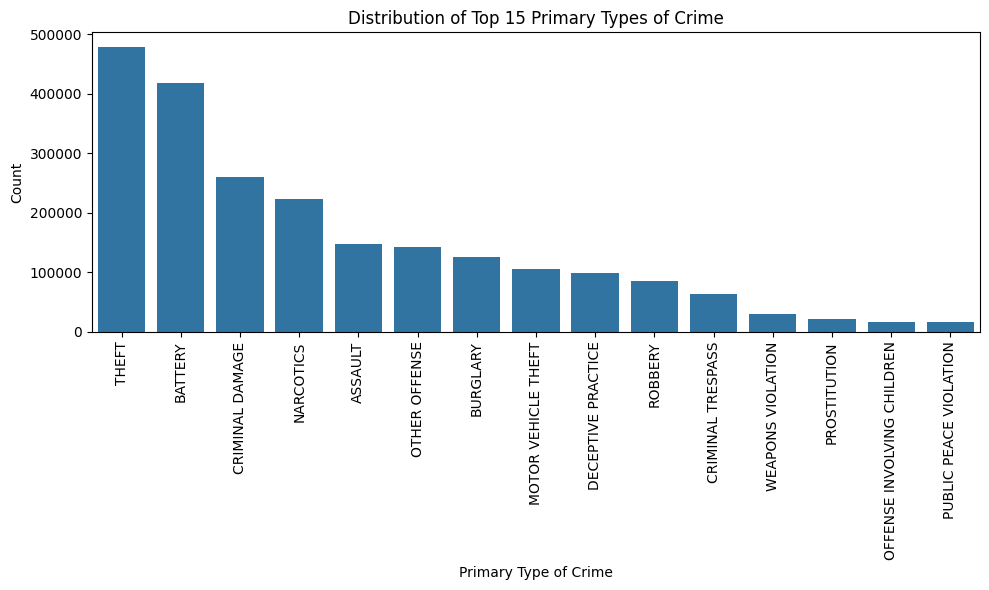

In [51]:
# Get the top 15 primary types of crime
top_15_crimes = chicrime_data1["Primary Type"].value_counts().head(15)

# Plot the distribution of the top 15 primary types of crime

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=top_15_crimes.index, y=top_15_crimes.values, color="#1f77b4")
plt.xticks(rotation=90)

# Set x-axis  and y-axis label
plt.xlabel("Primary Type of Crime")
plt.ylabel("Count")

# Set title
plt.title("Distribution of Top 15 Primary Types of Crime")

# Adjust Layout
plt.tight_layout()

# Show plot
plt.show()

Theft emerges as the predominant primary type of crime.

    5.1 RELATIONSHIP ANALYSIS
- 1. Which month generally has the greatest number of motor vehicle thefts?
- 2. What is the total number of incidents by arrest type and district?

In [52]:
chicrime_data1.head(2)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,HP485721,07/26/2008 02:30:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,46.0,2008,41.739980,-87.555120
1,JB372830,07/31/2018 10:57:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,47.0,2018,41.726922,-87.599747


In [53]:
# Create new column for month
# Convert 'Date' column to datetime format
chicrime_data1["Date"] = pd.to_datetime(chicrime_data1["Date"])

# Extract month from the 'Date' column
chicrime_data1["Month"] = chicrime_data1["Date"].dt.strftime('%B')


In [54]:
chicrime_data1.head(2)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month
0,HP485721,2008-07-26 14:30:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,46.0,2008,41.739980,-87.555120,July
1,JB372830,2018-07-31 10:57:00,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,47.0,2018,41.726922,-87.599747,July


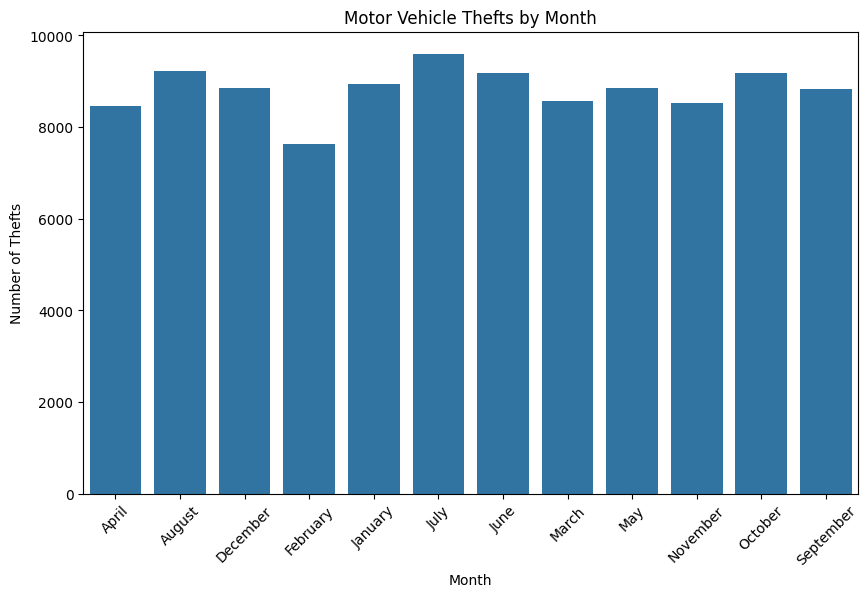

In [55]:
# Filter the DataFrame for motor vehicle thefts
vehicle_theft_data = chicrime_data1[chicrime_data1["Primary Type"] == "MOTOR VEHICLE THEFT"]

# Group by month and count occurrences
monthly_count = vehicle_theft_data["Month"].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_count.index, y=monthly_count.values, color="#1f77b4")

# Set title
plt.title("Motor Vehicle Thefts by Month")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.xticks(rotation=45)

# Show plot
plt.show()

The month of July has the highest number of motor vehicle thefts.

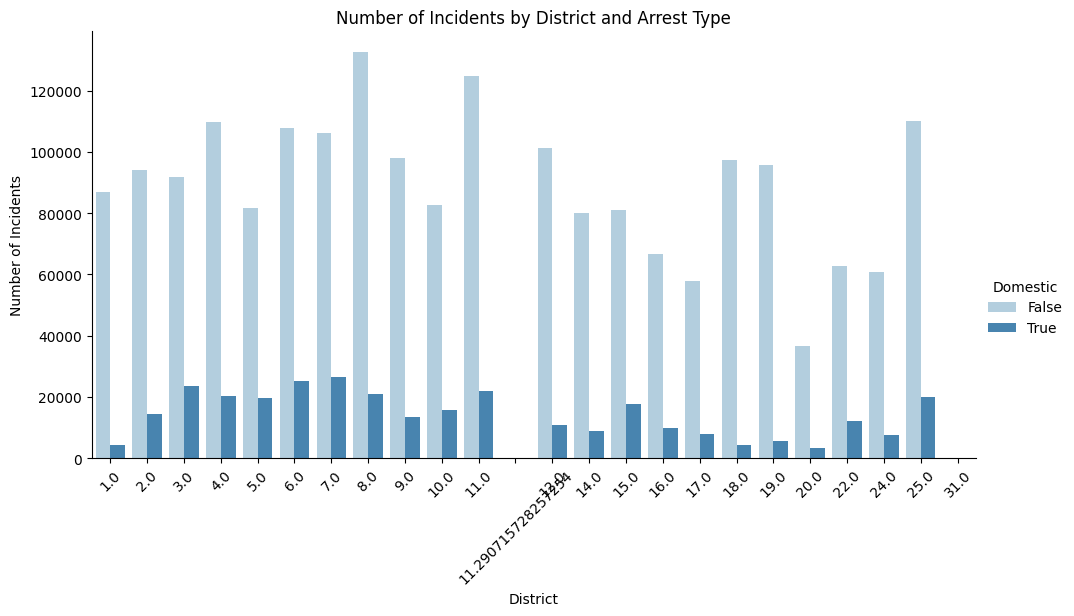

In [56]:
# Create a combined bar plot
sns.catplot(x="District", hue="Domestic", data=chicrime_data1, kind="count", palette="Blues", aspect=2)

# Set plot labels and title
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.title("Number of Incidents by District and Arrest Type")

# Rotate axis
plt.xticks(rotation=45)

# Show plot
plt.show()

In [57]:
chicrime_data1.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month
0,HP485721,2008-07-26 14:30:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,46.0,2008,41.739980,-87.555120,July
1,JB372830,2018-07-31 10:57:00,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,47.0,2018,41.726922,-87.599747,July
2,HN308568,2007-04-27 10:30:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,12.0,2007,41.994138,-87.734959,April
3,JB361368,2018-07-23 08:55:00,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,26.0,2018,41.881217,-87.730590,July
4,JE297624,2021-07-11 06:40:00,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,28.0,2021,41.874174,-87.668082,July


In [58]:
# Using function to create new columns for Months, Day, Time
from datetime import datetime

def create_month_day_column(df):
    """Creating new columns for month and day"""
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p')
    df['Month'] = df['Date'].dt.month_name()
    df['Day'] = df['Date'].dt.day_name()
    df['Time'] = df['Date'].dt.hour

    df['Time'] = df['Date'].apply(lambda x: 'Night' if 0 <= x.hour < 6
                                        else 'Morning' if 6 <= x.hour < 12
                                        else 'Afternoon' if 12 <= x.hour < 18
                                        else 'Evening')

    return df[['Month', 'Day', 'Time']]

In [59]:
# printing the month, day and time columns
chicrime_data1[['Month', 'Day', 'Time']] = create_month_day_column(chicrime_data1)
print(chicrime_data1[['Month', 'Day', 'Time']])

             Month        Day       Time
0             July   Saturday  Afternoon
1             July    Tuesday    Morning
2            April     Friday    Morning
3             July     Monday    Morning
4             July     Sunday    Morning
...            ...        ...        ...
2278721    October     Friday  Afternoon
2278722  September    Tuesday    Evening
2278723        May  Wednesday    Evening
2278724    October  Wednesday    Evening
2278725       June  Wednesday    Evening

[2278726 rows x 3 columns]


In [60]:
# Using function to create new columns for seasons
def create_season_column(df):
    """creating a column for seasons"""
    df['Seasons'] = df['Month'].apply(lambda x: 'Winter' if x in ['December', 'January', 'February']
                                     else 'Spring' if x in ['March', 'April', 'May']
                                     else 'Summer' if x in ['June', 'July', 'August']
                                     else 'Fall')

    return df['Seasons']

In [61]:
# creating column for seasons
chicrime_data1['Seasons'] = create_season_column(chicrime_data1)

In [62]:
# checking the updated chicrime data columns
chicrime_data1.columns

Index(['Case Number', 'Date', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District',
       'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'Day',
       'Time', 'Seasons'],
      dtype='object')

In [63]:
# viewing the first few rows of the dataframe
chicrime_data1.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month,Day,Time,Seasons
0,HP485721,2008-07-26 14:30:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,46.0,2008,41.739980,-87.555120,July,Saturday,Afternoon,Summer
1,JB372830,2018-07-31 10:57:00,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,47.0,2018,41.726922,-87.599747,July,Tuesday,Morning,Summer
2,HN308568,2007-04-27 10:30:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,12.0,2007,41.994138,-87.734959,April,Friday,Morning,Spring
3,JB361368,2018-07-23 08:55:00,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,26.0,2018,41.881217,-87.730590,July,Monday,Morning,Summer
4,JE297624,2021-07-11 06:40:00,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,28.0,2021,41.874174,-87.668082,July,Sunday,Morning,Summer


In [64]:
# Day of the week with the highest crime
crime_by_day = chicrime_data1.groupby('Day')['Day'].count()
day_with_most_crime = crime_by_day.idxmax()
print(f"Day with the most crime:", day_with_most_crime)

Day with the most crime: Friday


In [65]:
# Time of day with the highest crime
crime_by_day = chicrime_data1.groupby('Time')['Time'].count()
time_with_most_crime = crime_by_day.idxmax()
print(f"Time with the most crime:", time_with_most_crime)

Time with the most crime: Evening


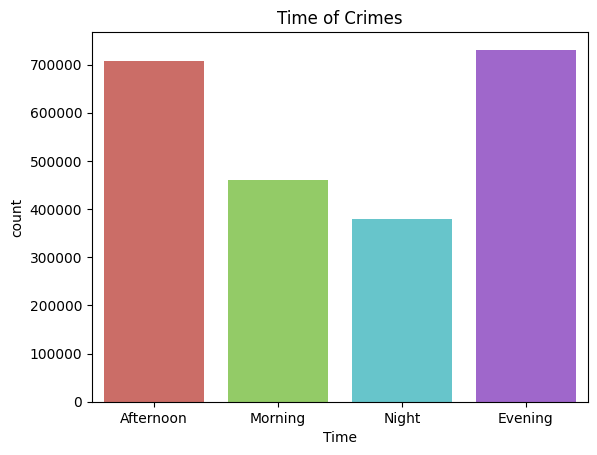

In [66]:
# plotting the graph for time of crime
sns.countplot(x = 'Time', data = chicrime_data1, palette="hls")
plt.title("Time of Crimes");

In [67]:
# Season with the highest crime
crime_by_seasons = chicrime_data1.groupby('Seasons')['Seasons'].count()
seasons_with_most_crime = crime_by_seasons.idxmax()
print(f"Seasons with the most crime:", seasons_with_most_crime)

Seasons with the most crime: Summer


In [68]:
# Group by season to calculate total crimes per season
total_crimes_by_season = chicrime_data1.groupby('Seasons').size().reset_index(name='Total_Crimes')
total_crimes_by_season

,Seasons,Total_Crimes
0,Fall,565853
1,Spring,580919
2,Summer,625095
3,Winter,506859


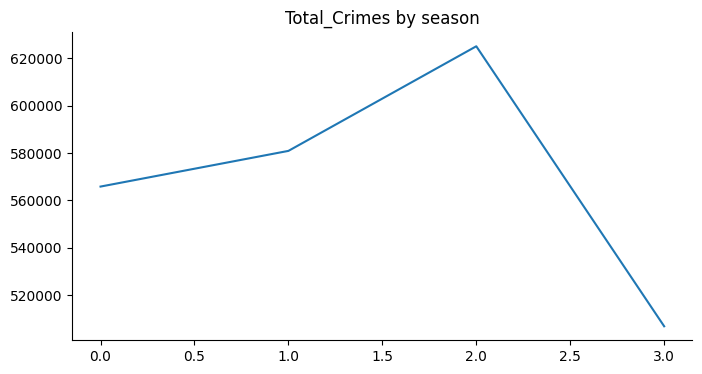

In [69]:
#  Total_Crimes by season
total_crimes_by_season['Total_Crimes'].plot(kind='line', figsize=(8, 4), title='Total_Crimes by season')
plt.gca().spines[['top', 'right']].set_visible(False)

In [70]:
# Highest and lowest crime

highest_crime = chicrime_data1["Primary Type"].value_counts().idxmax()
lowest_crime = chicrime_data1["Primary Type"].value_counts().idxmin()

print(f"Highest crime is :", highest_crime)
print(f"Lowest crime is :", lowest_crime)

Highest crime is : THEFT
Lowest crime is : NON-CRIMINAL (SUBJECT SPECIFIED)


In [71]:
# location description with the highest crime and the district
location_with_most_crime = chicrime_data1.groupby("District")["Location Description"].value_counts()
print(f"Location with most crime is:", location_with_most_crime.idxmax())

Location with most crime is: (11.0, 'STREET')


    CORRELATION
    

In [73]:
# Selected columns for correlation

corr_columns = ['Primary Type', 'Time', 'District','Arrest', 'Year', 'Latitude', 'Longitude']
selected_col = chicrime_data1[corr_columns]

# finding the correlation
correlation_matrix = selected_col.corr()

print(correlation_matrix)

           District    Arrest      Year  Latitude  Longitude
District   1.000000 -0.017918 -0.007142  0.631798  -0.540891
Arrest    -0.017918  1.000000 -0.092962 -0.000635  -0.032280
Year      -0.007142 -0.092962  1.000000 -0.001239   0.007685
Latitude   0.631798 -0.000635 -0.001239  1.000000  -0.475300
Longitude -0.540891 -0.032280  0.007685 -0.475300   1.000000


Text(0.5, 1.0, 'Correlation Matrix')

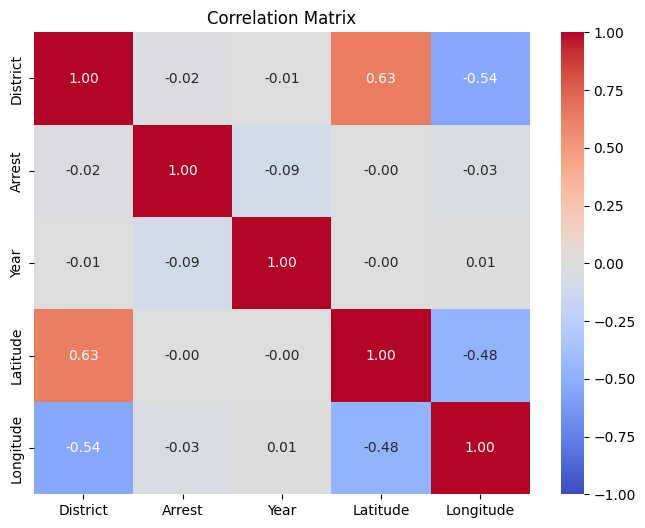

In [74]:
# Plotting a heatmap correlation graph between 'Primary Type', 'Time', 'District','Arrest', 'Year', 'Latitude', 'Longitude'

# Set a dark background color palette
sns.set_palette("Dark2")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')

<Axes: xlabel='Primary Type', ylabel='District'>

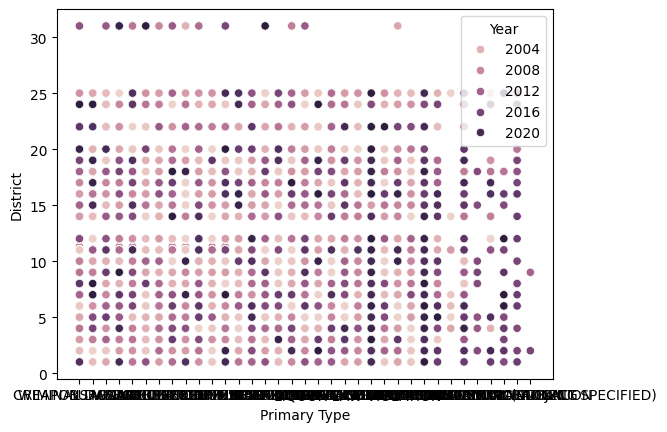

In [75]:
sns.scatterplot(data= chicrime_data1, x='Primary Type',y= 'District', hue= 'Year')

    Work Done
    - Understanding the data, checking for null values/missing values
      Nwajiunor

    - Filling Missing values and dropping redundant columns
      Joy/Nwajiunor

    - Outlier, statistical analysis
      Joy

    - Data Visualization/ Relationship analysis
      Joy/Nwajiunor
